### Gathering the Data

#### Import Libraries

In [1]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline


#### Get the data

In [2]:
# Define the parameters
start = "2019-01-01"
end = "2022-12-31"
company = ['^GSPC']

# Download historical data
stock = yf.download(company, start=start, end=end)
df = stock.copy()

df.reset_index(inplace=True)
date_column = df['Date']

df.head()


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### EDA

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

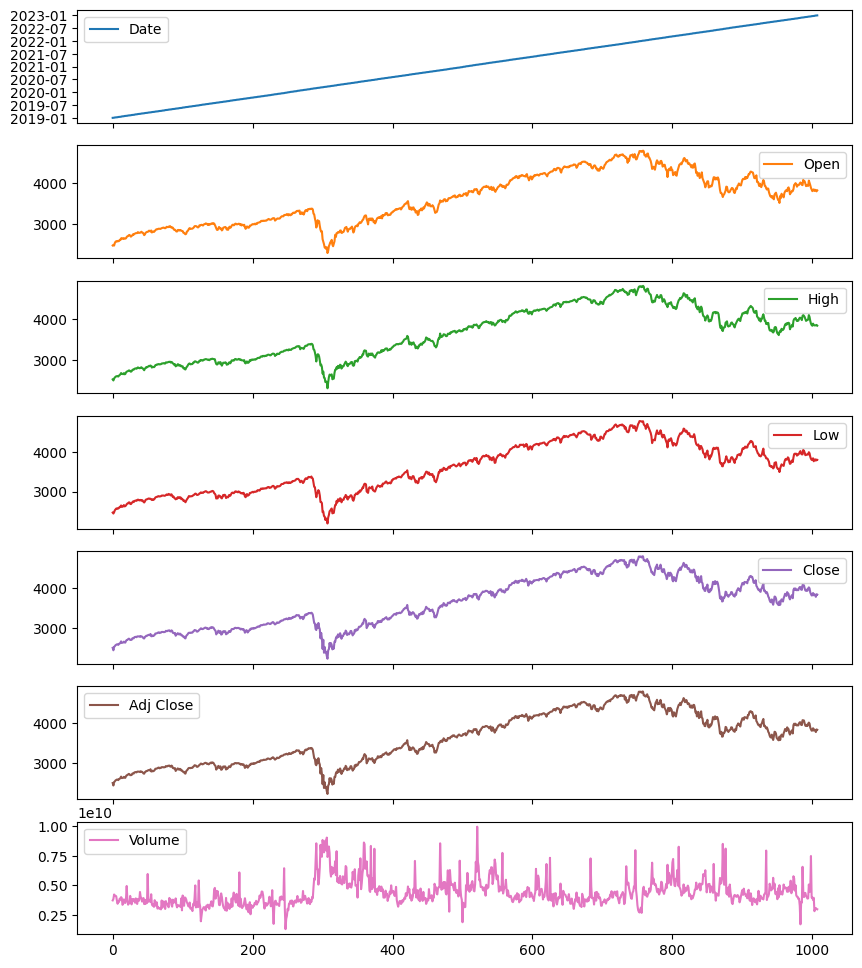

In [4]:
df.plot(subplots=True, figsize=(10,12))

<Axes: >

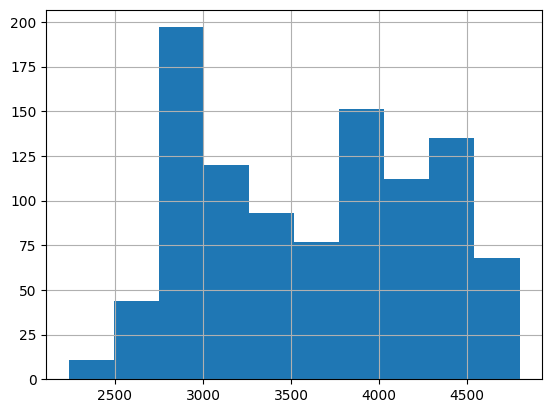

In [5]:
df['Close'].hist()

<Axes: ylabel='Density'>

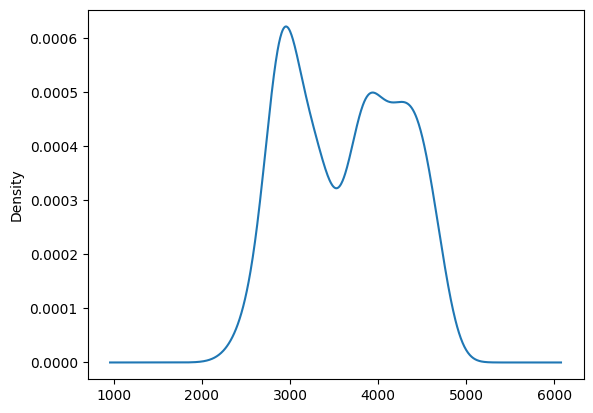

In [6]:
df['Close'].plot(kind='kde')

<Axes: title={'center': 'Daily Returns'}>

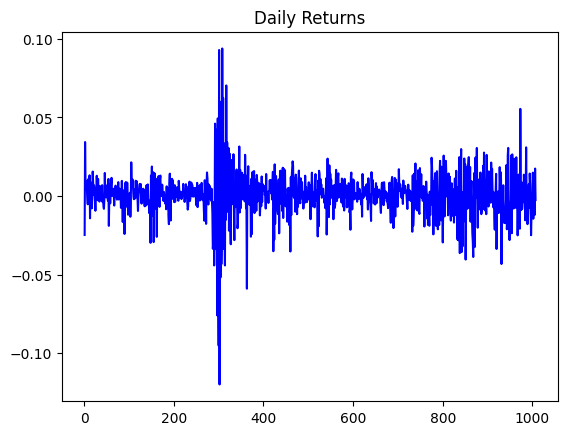

In [7]:
daily_return = df['Close'].pct_change(1) #1 for One DAY lookback
daily_return.plot(title='Daily Returns', color='b')


<Axes: >

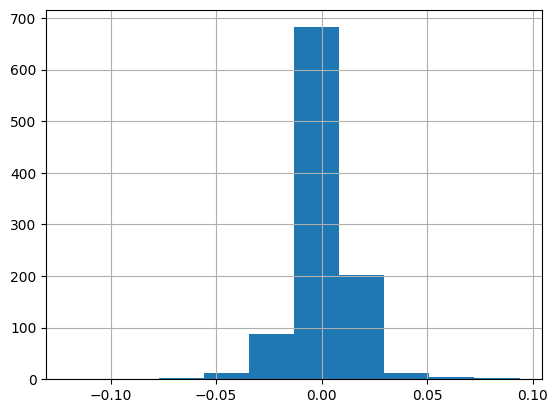

In [8]:
daily_return.hist()

<Axes: ylabel='Density'>

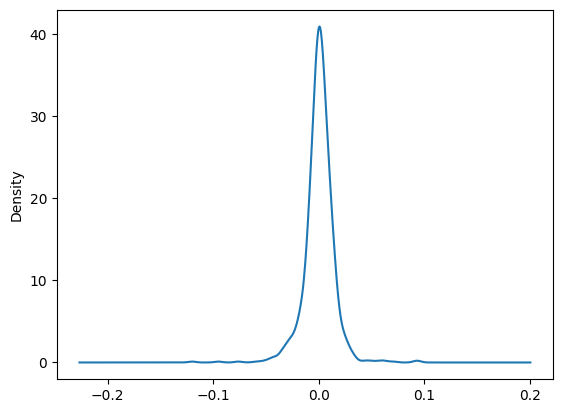

In [9]:
daily_return.plot(kind='kde')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1008 non-null   datetime64[ns]
 1   Open       1008 non-null   float64       
 2   High       1008 non-null   float64       
 3   Low        1008 non-null   float64       
 4   Close      1008 non-null   float64       
 5   Adj Close  1008 non-null   float64       
 6   Volume     1008 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.2 KB


In [11]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1008,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,2020-12-31 08:01:25.714285824,3624.417895,3647.218679,3599.614941,3624.904483,3624.904483,4.379268e+09
min,2019-01-02 00:00:00,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.296530e+09
25%,2020-01-01 12:00:00,3004.890076,3016.355103,2991.074951,3005.232483,3005.232483,3.674172e+09
50%,2020-12-30 12:00:00,3685.359985,3707.224976,3646.645020,3678.189941,3678.189941,4.133645e+09
75%,2021-12-30 06:00:00,4182.142578,4202.632446,4158.637573,4180.419922,4180.419922,4.817915e+09
max,2022-12-30 00:00:00,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.976520e+09
std,NaN,634.838500,637.420319,631.716356,634.328208,634.328208,1.109899e+09


In [12]:
df.Date = pd.to_datetime(df.Date)
df2 = df.set_index('Date')

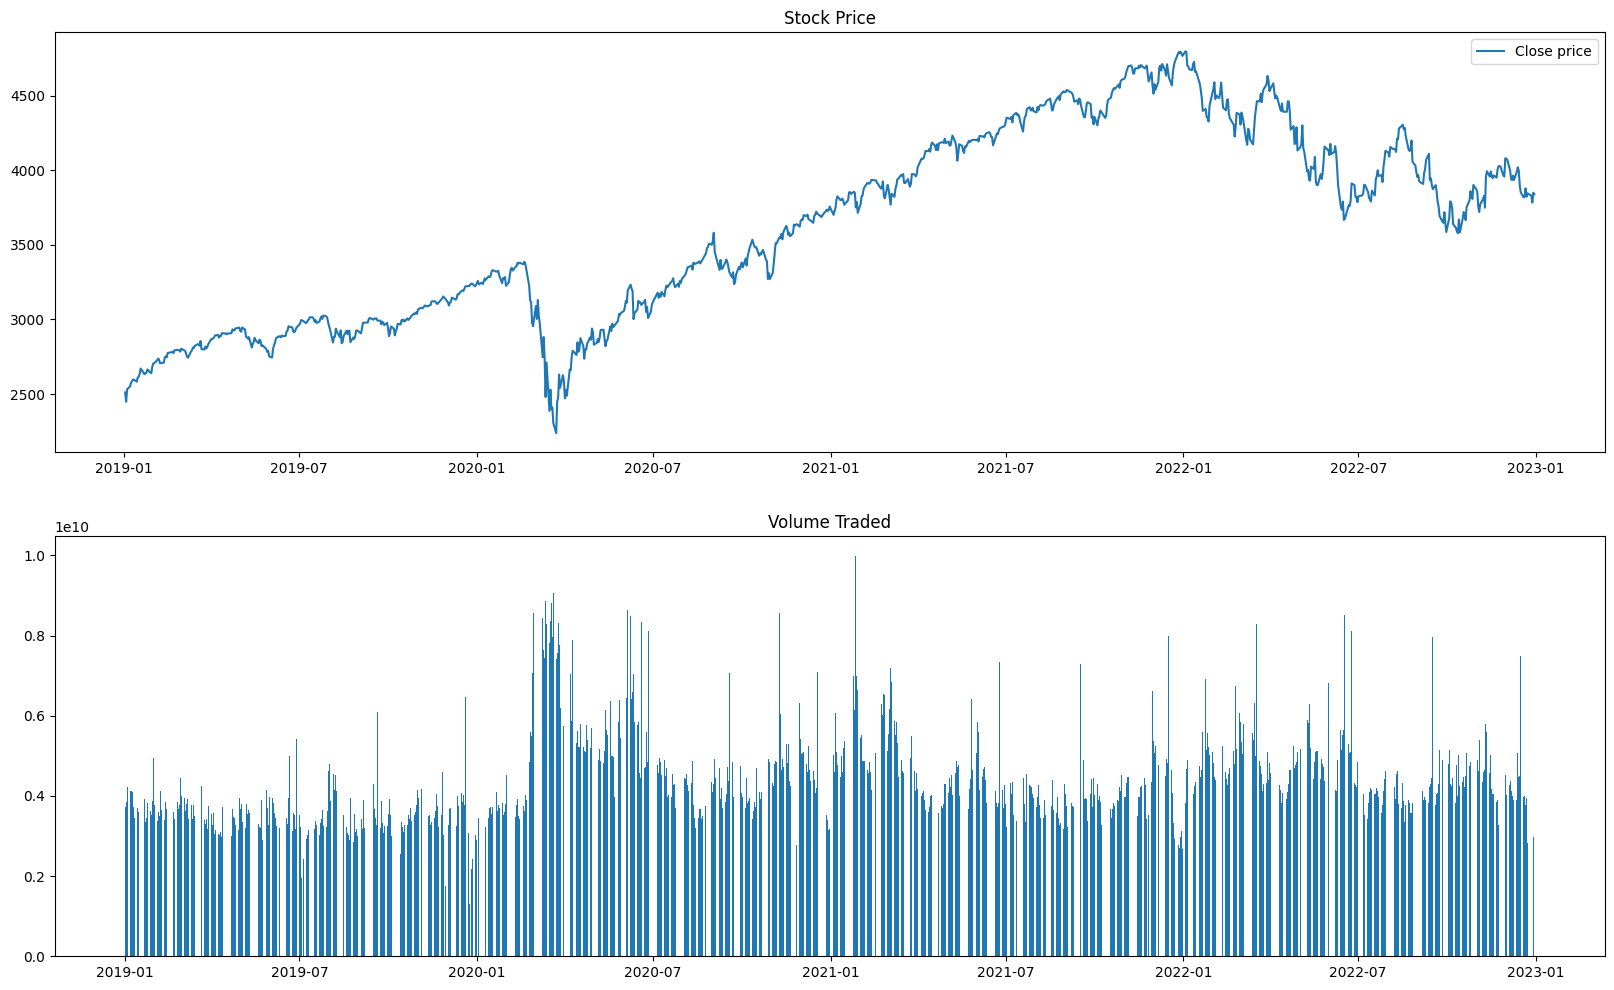

In [13]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()

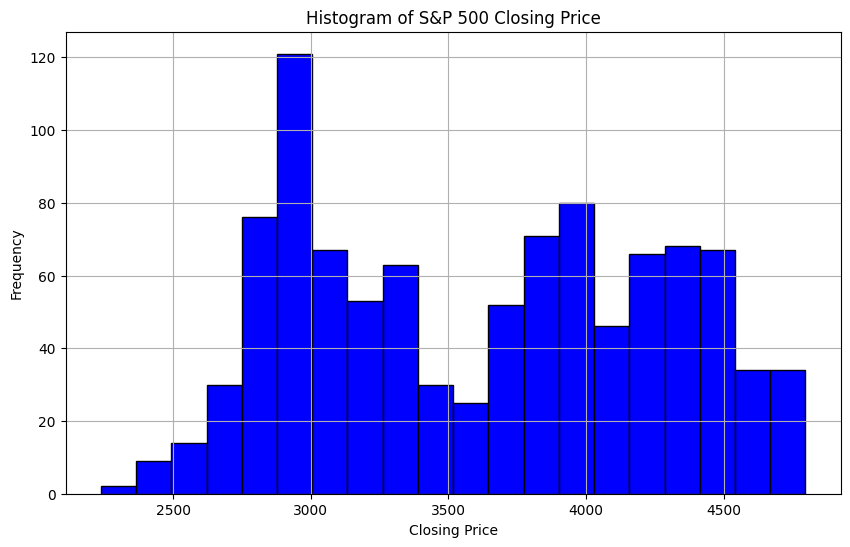

Mean Closing Price: 3624.9044833713106
Median Closing Price: 3678.18994140625
Skewness: 0.03837227904983965
Kurtosis: -1.2824331064648316


In [14]:
# Example: Analyzing the distribution of closing prices using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of S&P 500 Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Example: Insights from the histogram
print("Mean Closing Price:", df['Close'].mean())
print("Median Closing Price:", df['Close'].median())
print("Skewness:", df['Close'].skew())
print("Kurtosis:", df['Close'].kurt())


The mean closing price is higher than the median, indicating that there may be some relatively higher closing prices that are pushing the mean up.
The positive skewness suggests that the distribution of closing prices has a tail on the right, indicating the presence of relatively higher closing prices.
The negative kurtosis suggests that the distribution has lighter tails and fewer extreme values compared to a normal distribution.

#### Data Cleaning and Preprocessing

In [15]:
# Check for Null values
print("Null values:", df.isnull().values.sum())

# Check for NA values
print("NA values:", df.isna().values.any())

# Check for Duplicate values
print("Duplicate values:", df.duplicated().sum())


Null values: 0
NA values: False
Duplicate values: 0


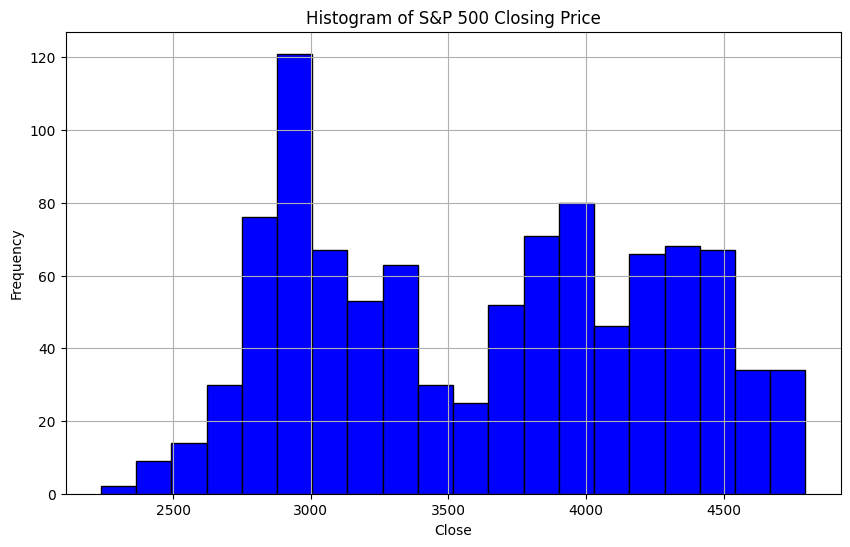

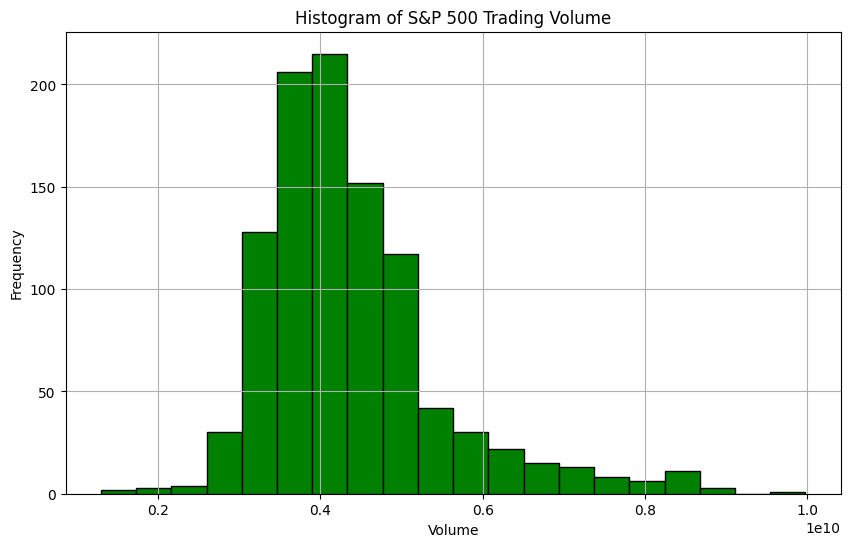

In [16]:
# Outliers in Closing Price
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=20, color='b', edgecolor='black')
plt.title('Histogram of S&P 500 Closing Price')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Outliers in Trading Volume
plt.figure(figsize=(10, 6))
plt.hist(df['Volume'], bins=20, color='g', edgecolor='black')
plt.title('Histogram of S&P 500 Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Time Series Analysis (Trend, Seasonality, Residual)
Level: The average value in the series.

Trend: The increasing or decreasing value in the series.

Seasonality: The repeating short-term cycle in the series.

Noise: The random variation in the series.


In [17]:
import statsmodels.api as sm

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
train = df.resample('D').interpolate(method='linear')

time_series = train['Close']
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [19]:
missing_values = df.isnull().sum()
missing_values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

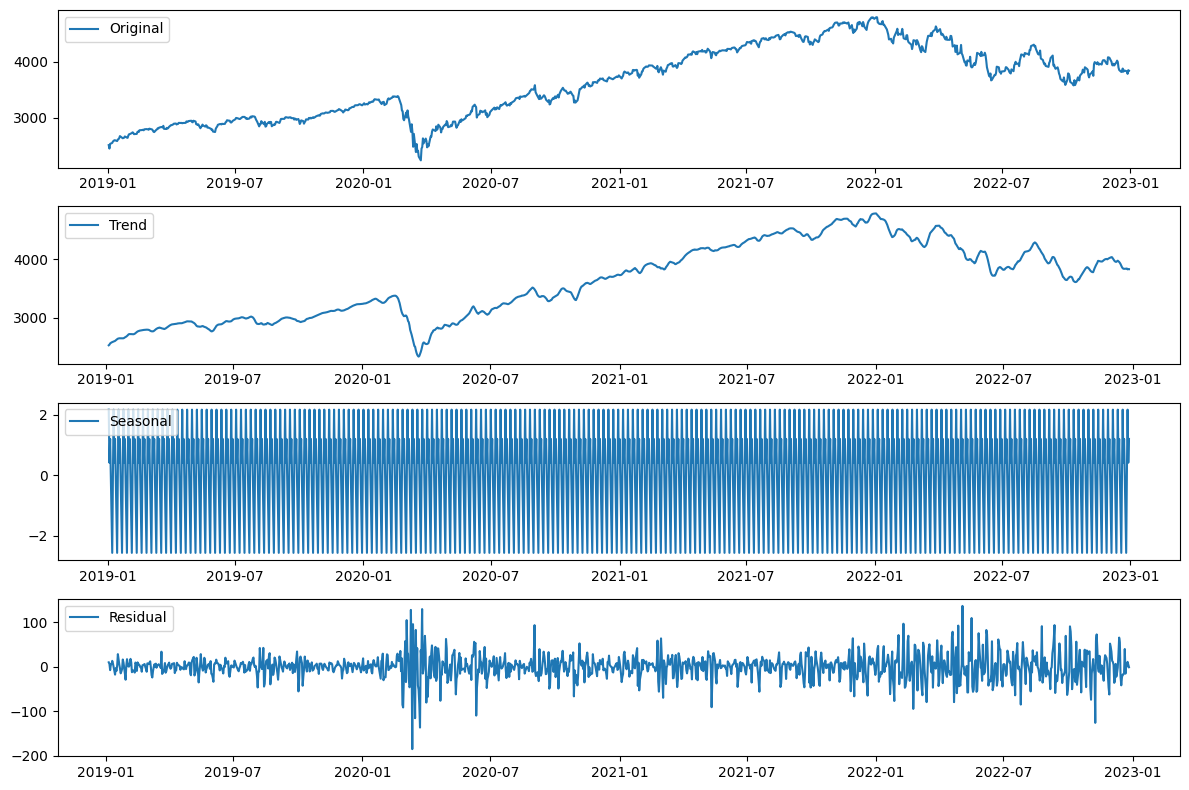

In [20]:
# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(time_series, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

The trend component represents the long-term movement or general direction in the data. It captures the underlying, gradual changes in the time series over a more extended period.

The seasonality component reflects the repeating patterns or fluctuations in the data that occur at fixed intervals, typically within a year or a shorter time frame.

The residuals, also known as errors or noise, are the leftover variations in the time series data that cannot be explained by the trend or seasonality components.